In [1]:
import keras
from keras import layers

import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import MinMaxScaler

In [2]:
tickers = [
           'BA', 
           'CAT',
           'DIS', 
           'GE', 
           'IBM', 
           'KO', 
           'AAPL', 
           'FB',
           'TSLA'] # 주식 목록. => 특징 분석을 수행할 주식의 목록

# HELPER

In [3]:
results_path = Path('autoencoder')
if not results_path.exists():
    results_path.mkdir()

experiment = 0

log_dir = results_path / f'experiment_{experiment:02}'
if not log_dir.exists():
    log_dir.mkdir(parents=True)

hdf_store = results_path / 'AutoEncoder.h5'

In [4]:
hdf_store

PosixPath('autoencoder/AutoEncoder.h5')

# 데이터를 로딩

In [5]:
def select_data():
           # HDF => .h5을 읽는 코드.                                        quandl => 주식에 대한 다양한 시계열을 제공
                                                                            # quandl 데이터에서 주가 정보를 가져오겠다.
    df = (pd.read_hdf('/content/drive/MyDrive/시계열_교안/6주차/assets.h5', 'quandl/wiki/prices') 
          .adj_close # 종가를 가지고 온 다음에
          .unstack('ticker') # ticker 별로 풀고
          .loc['2000':, tickers] # 지정한 ticker만 갖고 온다.
          .dropna())
    df.to_hdf(hdf_store, 'data/real') # data/real이란 폴더에 저장

In [6]:
select_data()

In [7]:
df = pd.read_hdf(hdf_store, 'data/real')

In [8]:
df

ticker,BA,CAT,DIS,GE,IBM,KO,AAPL,FB,TSLA
date,,,,,,,,,
2012-05-18,60.032758,74.702335,40.675603,15.791293,167.027133,31.304654,68.161222,38.2318,27.56
2012-05-21,62.316000,77.482192,41.214107,15.932957,168.630211,31.499119,72.132303,34.0300,28.77
2012-05-22,62.055554,77.069425,41.214107,15.982955,167.828672,31.363839,71.578408,31.0000,30.79
2012-05-23,62.133687,77.894959,41.046985,15.982955,167.231781,31.516029,73.324912,32.0000,31.02
2012-05-24,61.977420,77.010459,41.260530,16.041287,167.206200,31.943007,72.651499,33.0300,30.32
...,...,...,...,...,...,...,...,...,...
2018-03-21,337.100000,155.800000,101.820000,13.880000,156.690000,43.000000,171.270000,169.3900,316.53
2018-03-22,319.610000,146.900000,100.600000,13.350000,152.090000,42.760000,168.845000,164.8900,309.10
2018-03-23,321.000000,144.290000,98.540000,13.070000,148.890000,42.330000,164.940000,159.3900,301.54


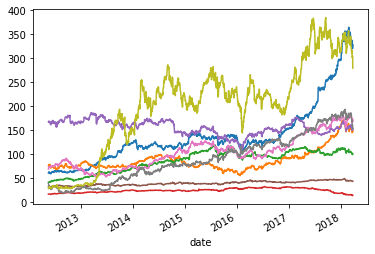

In [9]:
for col in df:
  df[col].plot()

# 데이터를 가공

In [10]:
df_values = df.values # 주가 데이터의 값만 추출

In [11]:
df_values

array([[ 60.03275797,  74.70233523,  40.6756033 , ...,  68.16122225,
         38.2318    ,  27.56      ],
       [ 62.31599952,  77.48219209,  41.21410707, ...,  72.13230292,
         34.03      ,  28.77      ],
       [ 62.05555371,  77.06942546,  41.21410707, ...,  71.57840785,
         31.        ,  30.79      ],
       ...,
       [321.        , 144.29      ,  98.54      , ..., 164.94      ,
        159.39      , 301.54      ],
       [328.97      , 149.19      , 100.65      , ..., 172.77      ,
        160.06      , 304.18      ],
       [321.12      , 146.99      ,  99.36      , ..., 168.34      ,
        152.19      , 279.18      ]])

In [12]:
df_values.shape

(1471, 9)

# 데이터 전처리 => 정규화

In [13]:
x_train = df_values.transpose() # 데이터를 뒤집는 코드

In [14]:
x_train

array([[ 60.03275797,  62.31599952,  62.05555371, ..., 321.        ,
        328.97      , 321.12      ],
       [ 74.70233523,  77.48219209,  77.06942546, ..., 144.29      ,
        149.19      , 146.99      ],
       [ 40.6756033 ,  41.21410707,  41.21410707, ...,  98.54      ,
        100.65      ,  99.36      ],
       ...,
       [ 68.16122225,  72.13230292,  71.57840785, ..., 164.94      ,
        172.77      , 168.34      ],
       [ 38.2318    ,  34.03      ,  31.        , ..., 159.39      ,
        160.06      , 152.19      ],
       [ 27.56      ,  28.77      ,  30.79      , ..., 301.54      ,
        304.18      , 279.18      ]])

In [15]:
# 평균과 편차를 활용해서 정규화 => 수익률 = (수익률 - 평균수익률) / (수익률의 표준편차)
normalized_x = []
means = []
stds = []
for x in x_train:
  x_mean = np.mean(x)
  x_std = np.std(x)
  means.append(x_mean)
  stds.append(stds)
  normalized_x.append((x - x_mean) / x_std)

In [16]:
normalized_x = np.array(normalized_x)

In [17]:
normalized_x

array([[-1.20895665, -1.17291493, -1.17702615, ...,  2.9104973 ,
         3.03630637,  2.91239154],
       [-0.52262305, -0.39835935, -0.41681063, ...,  2.58804815,
         2.80708537,  2.70874213],
       [-2.03458249, -2.01004147, -2.01004147, ...,  0.60244891,
         0.69860711,  0.63981845],
       ...,
       [-1.06371652, -0.94324542, -0.96004899, ...,  1.8722716 ,
         2.10981115,  1.97541777],
       [-1.05580316, -1.14245756, -1.20494574, ...,  1.44286193,
         1.45667945,  1.29437517],
       [-1.84520436, -1.8323474 , -1.81088371, ...,  1.06599393,
         1.09404548,  0.82840581]])

In [18]:
# 주식의 숫자, 날짜의 갯수 => 몇일치 데이터가 있는지 => 주식의 숫자, 날짜의 갯수, 데이터의 갯수
normalized_x.shape

(9, 1471)

In [19]:
# 주식의 숫자, 날짜의 갯수 => 몇일치 데이터가 있는지 => 주식의 숫자, 날짜의 갯수, 데이터의 갯수
#                           reshape => 데이터의 형태를 바꾸는 함수.
# normalized_x = normalized_x.reshape(6, 4586, 1) # 6개 주식을 썼던 코드
# normalized_x = normalized_x.reshape(9, 1471, 1) # 9개 주식을 썼던 코드
                                     # 주식의 갯수,         날짜의 갯수
normalized_x = normalized_x.reshape(normalized_x.shape[0], normalized_x.shape[1], 1) # 주식의 숫자, 날짜의 갯수 => 몇일치 데이터가 있는지 => 주식의 숫자, 날짜의 갯수, 데이터의 갯수

In [20]:
normalized_x.shape

(9, 1471, 1)

In [ ]:
normalized_x

array([[[-1.20895665],
        [-1.17291493],
        [-1.17702615],
        ...,
        [ 2.9104973 ],
        [ 3.03630637],
        [ 2.91239154]],

       [[-0.52262305],
        [-0.39835935],
        [-0.41681063],
        ...,
        [ 2.58804815],
        [ 2.80708537],
        [ 2.70874213]],

       [[-2.03458249],
        [-2.01004147],
        [-2.01004147],
        ...,
        [ 0.60244891],
        [ 0.69860711],
        [ 0.63981845]],

       ...,

       [[-1.06371652],
        [-0.94324542],
        [-0.96004899],
        ...,
        [ 1.8722716 ],
        [ 2.10981115],
        [ 1.97541777]],

       [[-1.05580316],
        [-1.14245756],
        [-1.20494574],
        ...,
        [ 1.44286193],
        [ 1.45667945],
        [ 1.29437517]],

       [[-1.84520436],
        [-1.8323474 ],
        [-1.81088371],
        ...,
        [ 1.06599393],
        [ 1.09404548],
        [ 0.82840581]]])

# 모델링 파트

In [22]:
timesteps = normalized_x.shape[1]  # Length of your sequences
input_dim = 1
latent_dim = 500 # 모델의 복잡도 => 모델링 할 주식 특성 갯수. => 많으면 좋으냐? => 정답은 아니고, 우리가 세운 가설이 몇개냐?

inputs = keras.Input(shape=(timesteps, input_dim))
# ENCODER 시작.
encoded = layers.LSTM(
    latent_dim,
    return_sequences=False
    )(inputs) 

encoded = layers.Dense(100)(encoded) # 모델링할 팩터의 개수 지정. => z_vec

# DECODER 시작.
decoded = layers.RepeatVector(timesteps)(encoded) # decoder
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)
# DECODER를 만듦.

sequence_autoencoder = keras.Model(inputs, decoded) # 모델의 시작: 입력, 모델의 끝: 디코더의 출력.
encoder = keras.Model(inputs, encoded) # 모델의 시작: 입력, 모델의 끝: 인코더의 출력

In [23]:
sequence_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1471, 1)]         0         
                                                                 
 lstm_2 (LSTM)               (None, 500)               1004000   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1471, 100)        0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 1471, 1)           408       
                                                                 
Total params: 1,054,508
Trainable params: 1,054,508
Non-trainable params: 0
_________________________________________________

In [24]:
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1471, 1)]         0         
                                                                 
 lstm_2 (LSTM)               (None, 500)               1004000   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
Total params: 1,054,100
Trainable params: 1,054,100
Non-trainable params: 0
_________________________________________________________________


In [25]:
sequence_autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
sequence_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4586, 1)]         0         
                                                                 
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 repeat_vector (RepeatVector  (None, 4586, 128)        0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4586, 1)           520       
                                                                 
Total params: 67,080
Trainable params: 67,080
Non-trainable params: 0
_________________________________________________________________


In [26]:
sequence_autoencoder.fit(normalized_x, normalized_x, epochs=100)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.7950
Epoch 2/100
1/1 [==============================] - 1s 593ms/step - loss: 0.8319
Epoch 3/100
1/1 [==============================] - 1s 555ms/step - loss: 0.8265
Epoch 4/100
1/1 [==============================] - 1s 556ms/step - loss: 0.8226
Epoch 5/100
1/1 [==============================] - 1s 553ms/step - loss: 0.8099
Epoch 6/100
1/1 [==============================] - 1s 558ms/step - loss: 0.7941
Epoch 7/100
1/1 [==============================] - 1s 553ms/step - loss: 0.7931
Epoch 8/100
1/1 [==============================] - 1s 558ms/step - loss: 0.7933
Epoch 9/100
1/1 [==============================] - 1s 564ms/step - loss: 0.7858
Epoch 10/100
1/1 [==============================] - 1s 565ms/step - loss: 0.7872
Epoch 11/100
1/1 [==============================] - 1s 569ms/step - loss: 0.7894
Epoch 12/100
1/1 [==============================] - 1s 567ms/step - loss: 0.7881
Epoch 13/100
1/1 [======================

In [27]:
                # encoder에 입력을 넣음.
x_test_encoded = encoder.predict(normalized_x)

In [28]:
x_test_encoded

array([[ 9.18509886e-02,  2.78938949e-01,  3.22840244e-01,
         3.74431014e-02,  2.18767777e-01,  1.05942674e-01,
        -1.40180081e-01, -1.37707703e-02, -2.03555509e-01,
         6.30726740e-02,  6.93483949e-02, -1.21977441e-01,
         1.00251986e-02, -1.19057354e-02,  1.75799578e-02,
        -1.05351694e-01, -2.02406362e-01, -9.72171351e-02,
        -1.76760837e-01, -8.73375125e-03,  2.63729215e-01,
         6.58121705e-02, -9.55948010e-02, -3.14719319e-01,
         6.06788322e-02,  8.13226625e-02,  1.10467702e-01,
         1.34640753e-01,  2.34001964e-01,  2.57571042e-01,
         3.58064808e-02,  2.39250213e-01,  9.02004354e-03,
        -2.00562757e-02, -1.21851109e-01,  2.02363096e-02,
         3.16216707e-01,  2.46698689e-03,  2.11975664e-01,
         5.67826889e-02,  1.06737599e-01,  3.37618262e-01,
         3.12197506e-01,  2.80258089e-01, -1.64613519e-02,
         1.72843233e-01, -3.74342561e-01,  1.25705972e-01,
        -4.20282871e-01,  1.34723395e-01, -2.51112193e-0

In [29]:
x_test_encoded.shape

(9, 100)

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # PCA => 주성분 분석 => 주성분을 가지고 클러스터링. => 500차원 벡터 => 2차원 => 시각화.

            # 축소 시킬 차원의 갯수.
tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=5)
                            # z-vector를 TSNE에 넣어서 2차원 값으로 축소.
tsne_v = tsne.fit_transform(x_test_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.000s...
[t-SNE] Computed neighbors for 9 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 0.889745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.542587
[t-SNE] KL divergence after 300 iterations: 0.503885


In [31]:
tsne_v

array([[ 170.7188   ,   -7.6343956],
       [  -4.5393853,  199.80008  ],
       [-109.76383  ,   -3.2694597],
       [-194.7065   ,  149.52773  ],
       [ 129.20985  ,  140.54575  ],
       [  -1.0178468,  -18.90888  ],
       [  -1.0688896,  303.4988   ],
       [   9.13349  ,   79.16946  ],
       [ -35.569244 , -112.85007  ]], dtype=float32)

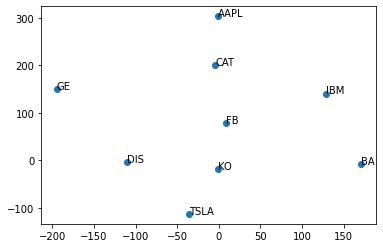

In [32]:

plt.scatter(tsne_v[:, 0], tsne_v[:, 1])
# ax.scatter(tsne_v[:, 0], tsne_v[:, 1])
for i, txt in enumerate(tickers):
    plt.annotate(txt, (tsne_v[:, 0][i], tsne_v[:, 1][i]))
# plt.colorbar()
plt.show()

In [ ]:
df

ticker,BA,CAT,DIS,GE,IBM,KO
date,,,,,,
2000-01-03,27.180308,14.984244,23.839401,29.005613,85.155442,17.779754
2000-01-04,27.139731,14.790123,25.235618,27.845388,82.263093,17.839810
2000-01-05,29.040120,15.347834,26.129196,27.797045,85.155442,18.035783
2000-01-06,29.121276,15.908626,25.235618,28.168317,83.687245,18.016818
2000-01-07,29.966645,16.426281,24.836699,29.258928,83.320195,19.202135
...,...,...,...,...,...,...
2018-03-21,337.100000,155.800000,101.820000,13.880000,156.690000,43.000000
2018-03-22,319.610000,146.900000,100.600000,13.350000,152.090000,42.760000
2018-03-23,321.000000,144.290000,98.540000,13.070000,148.890000,42.330000


[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.000s...
[t-SNE] Computed neighbors for 6 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 36.950418
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.346310
[t-SNE] KL divergence after 300 iterations: 0.326128


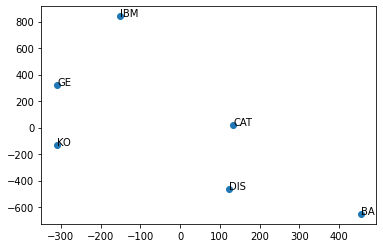

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # PCA (주성분 분석)

x_test_encoded = encoder.predict(normalized_x)
tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=5)
tsne_v = tsne.fit_transform(x_test_encoded)

plt.scatter(tsne_v[:, 0], tsne_v[:, 1])
# ax.scatter(tsne_v[:, 0], tsne_v[:, 1])
for i, txt in enumerate(tickers):
    plt.annotate(txt, (tsne_v[:, 0][i], tsne_v[:, 1][i]))
# plt.colorbar()
plt.show()


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=5)

In [ ]:
tsne_v = tsne.fit_transform(x_test_encoded)

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.000s...
[t-SNE] Computed neighbors for 6 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 47.267133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.195358
[t-SNE] KL divergence after 300 iterations: 0.156443


In [ ]:
tsne_v

array([[-147.95686  ,   91.73948  ],
       [-117.29268  ,  -27.679321 ],
       [  64.74699  ,  195.8893   ],
       [ -99.446236 ,  216.02258  ],
       [  22.236149 ,    2.3675494],
       [ -24.006056 ,  115.34841  ]], dtype=float32)

In [ ]:
tsne_v[:, 0][i]

-38.56531